In [1]:
#set some constants
ITEMSPERCAMERA = 10
YRANDOM=1024
CAMERAS=2
DROPPED=0
CMC=100
EXPERIMENTS=100

In [2]:
DATASETFILES = [('/local_data/dgrossman/image_body_type',4),
                ('/local_data/dgrossman/image_color_type',10),
                ('/local_data/dgrossman/image_color_body_type',40),
                ('/local_data/dgrossman/image_make_model_type',1057)]

In [3]:
from pelops.datasets.featuredataset import FeatureDataset
from pelops.experiment_api.experiment import ExperimentGenerator
from pelops.analysis import analysis

alldata = list()
for datasetfile,num in DATASETFILES:
    #do the math
    print(datasetfile)
    featureData = FeatureDataset(datasetfile)
    expGen = ExperimentGenerator(featureData, CAMERAS, ITEMSPERCAMERA, DROPPED, YRANDOM)
    experimentHolder = analysis.repeat_pre_cmc(featureData,expGen,NUMCMC=CMC,EXPPERCMC=EXPERIMENTS)
    stats,gdata = analysis.make_cmc_stats(experimentHolder,ITEMSPERCAMERA)
    alldata.append(gdata)

In [4]:
import numpy as np
stats = np.zeros((100,4))


In [5]:
for x in range(4):
    for y in range(100):
        stats[y][x] = alldata[x][1][y]

In [6]:
stats[3]

array([ 0.1062,  0.2588,  0.293 ,  0.1752])

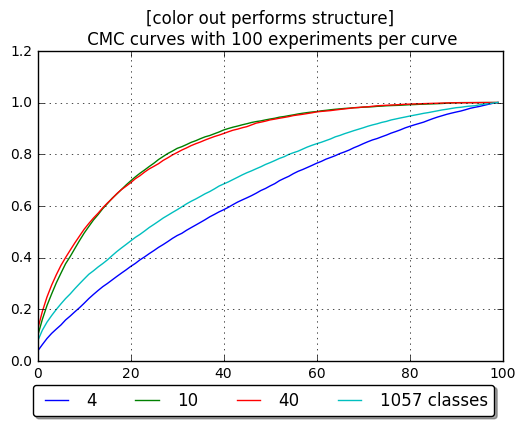

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

#make the plots
fig = plt.figure()
ax = plt.subplot(111)

ax.plot(stats)
plt.title('[color out performs structure]\n CMC curves with {} experiments per curve'.format(CMC,EXPERIMENTS))
plt.grid(True)
ax.legend(('4','10','40','1057 classes'),bbox_to_anchor=(1, -0.05),
          fancybox=True, shadow=True, ncol=5)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

#make the plots
fig = plt.figure()
ax = plt.subplot(111)

ax.plot(gdata.transpose())
plt.title('10 classes [color]\n{} CMC curves with {} experiments per curve'.format(CMC,EXPERIMENTS))
plt.grid(True)
ax.legend(('4','10','40','1057'),bbox_to_anchor=(1, -0.05),
          fancybox=True, shadow=True, ncol=5)